<a href="https://colab.research.google.com/github/GovardhanRajulapati073/AIML-2025/blob/main/2303A54044_AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv("/content/drive/MyDrive/AIML LAB/house_price_regression_dataset.csv")
df.head()


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [7]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB
None


In [8]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64


In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Square_Footage  Num_Bedrooms  Num_Bathrooms   Year_Built     Lot_Size  \
count     1000.000000   1000.000000    1000.000000  1000.000000  1000.000000   
mean      2815.422000      2.990000       1.973000  1986.550000     2.778087   
std       1255.514921      1.427564       0.820332    20.632916     1.297903   
min        503.000000      1.000000       1.000000  1950.000000     0.506058   
25%       1749.500000      2.000000       1.000000  1969.000000     1.665946   
50%       2862.500000      3.000000       2.000000  1986.000000     2.809740   
75%       3849.500000      4.000000       3.000000  2004.250000     3.923317   
max       4999.000000      5.000000       3.000000  2022.000000     4.989303   

       Garage_Size  Neighborhood_Quality   House_Price  
count  1000.000000           1000.000000  1.000000e+03  
mean      1.022000              5.615000  6.188610e+05  
std       0.814973              2.887059  2.535681e+05  
min       0.000000        

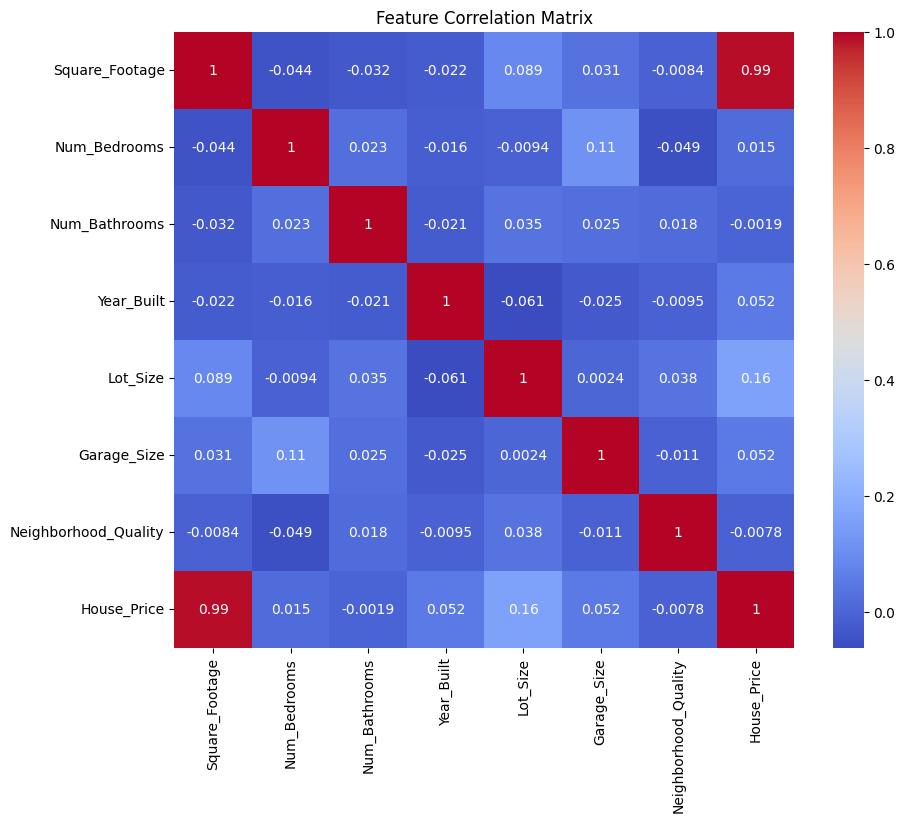

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [13]:
X = df.drop('House_Price', axis=1)
y = df['House_Price']

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [18]:
metrics = {
    "Training R2 Score": r2_score(y_train, y_train_pred),
    "Testing R2 Score": r2_score(y_test, y_test_pred),
    "Training MAE": mean_absolute_error(y_train, y_train_pred),
    "Testing MAE": mean_absolute_error(y_test, y_test_pred),
    "Training MSE": mean_squared_error(y_train, y_train_pred),
    "Testing MSE": mean_squared_error(y_test, y_test_pred),
    "Training RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
    "Testing RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
}

In [19]:
print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")



Model Performance Metrics:
Training R2 Score: 1.00
Testing R2 Score: 1.00
Training MAE: 7641.87
Testing MAE: 8174.58
Training MSE: 93850531.96
Testing MSE: 101434798.51
Training RMSE: 9687.65
Testing RMSE: 10071.48


In [20]:
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


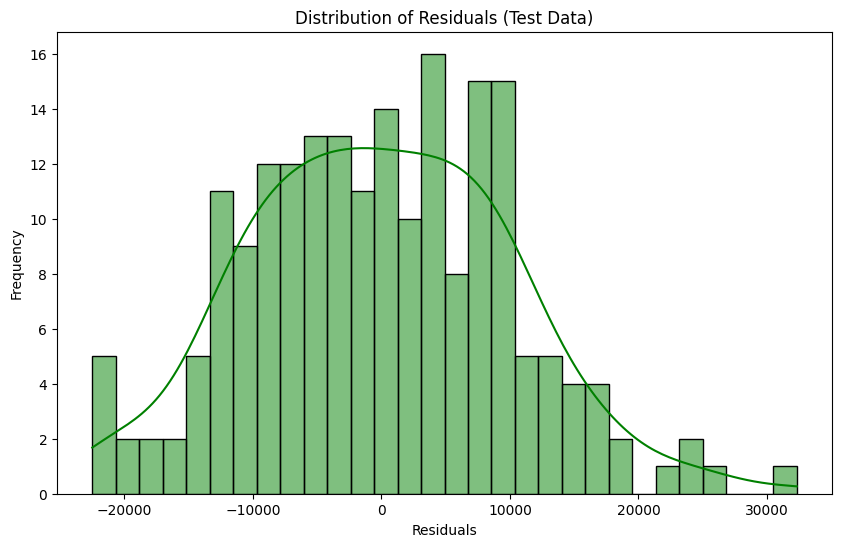

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(test_residuals, kde=True, color="green", bins=30)
plt.title("Distribution of Residuals (Test Data)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

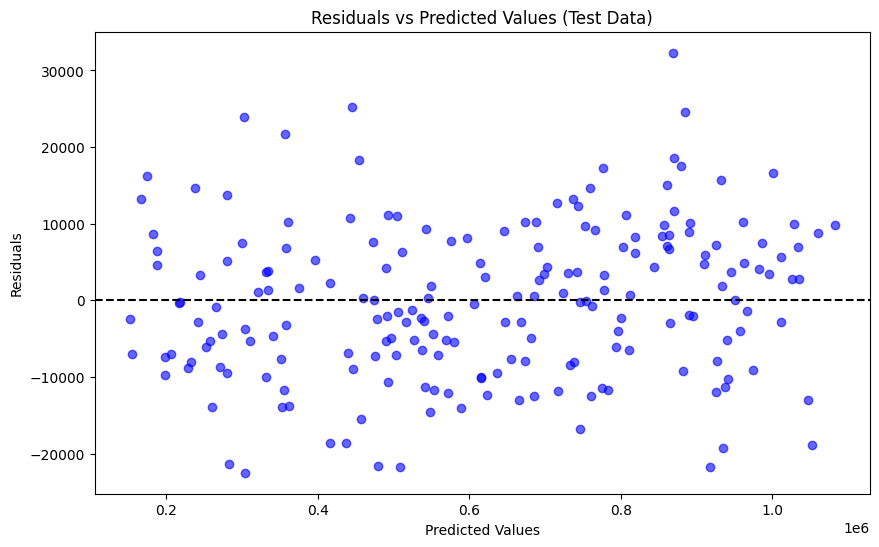

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, test_residuals, color="blue", alpha=0.6)
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residuals vs Predicted Values (Test Data)")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()